# 모형평가 실습

* load_digits : 8X8 픽셀로 이루어진 0~9까지 손글씨 데이터셋
* 손글씨 데이터셋을 읽어들이고 로지스틱 회귀로 분류모형을 생성한다.
* 생성된 분류 모형을 평가한다.
    * K-Fold Cross Validation
    * Confusion matrix 
    * Accuracy, Precision, Recall etc
    * ROC, AUC

In [1]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

In [3]:
# 훈련데이터셋과 테스트데이터셋을 분리한다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=1)


### 문제 1

* RandomForestClassifier로 분류 모형을 생성한다.

In [4]:
from sklearn.ensemble import RandomForestClassifier

# 로지스틱 회귀 객체를 만듭니다.
rf = RandomForestClassifier()


### 문제 2

* 10-Fold cross validation 을 사용하여 문제 1에서 생성한 모형을 accuracy에 대해 평가해 보자.
* 평균 accuracy를 확인해 보자.

In [5]:
# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(rf, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9760707635009311

### 문제 3
* Confusion Matix를 출력하시오.

In [6]:
y_pred = rf.fit(X_train, y_train).predict(X_test)
mat = metrics.confusion_matrix(y_test, y_pred)
print(mat)

[[57  0  0  0  2  0  0  0  0  0]
 [ 0 48  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  1  0 61  0  0  0  1  1  0]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  1]
 [ 0  0  0  0  0  0  0  0 45  1]
 [ 0  0  0  0  0  2  0  0  0 55]]


### 문제 4

* 생성된 로지스틱 회귀 모형의 Accuracy, Precision, Recall, F1 score를 출력하시오.
* classification_report를 사용하시오.

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
                           y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.98      0.98      0.98        49
           2       1.00      1.00      1.00        49
           3       1.00      0.95      0.98        64
           4       0.97      1.00      0.98        61
           5       0.94      0.98      0.96        47
           6       1.00      1.00      1.00        51
           7       0.98      0.98      0.98        57
           8       0.98      0.98      0.98        46
           9       0.95      0.96      0.96        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### 문제 5
* validation_curve를 사용한다.
* RandomForestClassifier의 n_estimator의 값을 변경할 때 모형의 성능 변화를 확인한다.
* 그래프를 그려서 훈련데이터셋과 테스트데이터셋의 accuracy를 비교하여 시각화 하시오.

In [8]:
# RandomForestClassifier의 n_estimator의 값을 변경할 때 모형의 성능 변화를 확인

from sklearn.model_selection import validation_curve
import numpy as np

param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(rf,
                                             X_train,
                                             y_train,
                                             param_name = "n_estimators",
                                             param_range = param_range,
                                             cv=3,
                                             scoring = 'accuracy'
                                            )

In [9]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

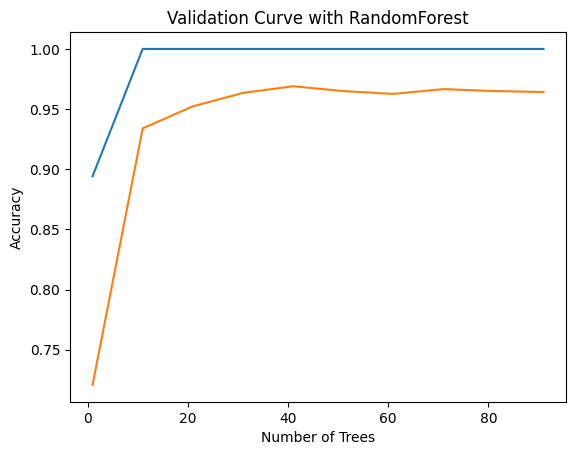

In [10]:
# 훈련데이터셋과 테스트데이터셋의 accuracy를 비교하여 시각화한다.
import matplotlib.pyplot as plt

plt.plot(param_range, train_mean, label='Training Scores')
plt.plot(param_range, test_mean, label = 'Testing Scores')
plt.title("Validation Curve with RandomForest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()